## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
# reads 'car data.csv' as a pandas dataframe
df = pd.read_csv("../data/car data.csv")

# displays the top 5 columns of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Dataset Understanding

In [3]:
# no of rows and columns in the dataframe
df.shape

(301, 9)

In [4]:
# column names of the dataframe
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
# data types of each column in the dataframe
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
# displays the columns that are in object data type
df.dtypes[df.dtypes == object]

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

In [7]:
# basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# count values of categorical column 'Fuel Type'
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
# count values of categorical column 'Seller Type'
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
# count values of categorical column 'Transmission'
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [11]:
from datetime import date

# Create a new column named no_of_years that stores difference between the current year and car's buying year
df["Current_Year"] = date.today().year

# Calculates difference between the current year and car's buying year
df["No_of_years"] = df["Current_Year"] - df["Year"]

# Dropping unwanted columns from the DataFrame
df.drop(["Car_Name", "Year", "Current_Year"], axis=1, inplace=True)

# displays first 5 rows of the dataframe
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [12]:
# counting null values in each column of the dataframe
df.isna().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
No_of_years      0
dtype: int64

In [13]:
# gives a brief summary stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
No_of_years,301.0,8.372093,2.891554,4.00,6.0,8.0,10.0,19.0


## Data Visualization

In [14]:
from scipy import stats
from statsmodels.api import qqplot

In [15]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df[col_name].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df[col_name].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df[col_name].value_counts().plot.barh(
        ax=ax[1]
    )  # plots bar chart of Outcome column value counts

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

In [16]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(14, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20, hue="Fuel_Type", palette="Set2"
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True, hue="Fuel_Type", palette="Set2"
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name,
        data=df,
        ax=axes[1][1],
        fill=True,
        cumulative=True,
        hue="Fuel_Type",
        palette="Set2",
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [17]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(14, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="Fuel_Type", data=df, ax=axes[0][0], palette="Set2"
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="Fuel_Type", data=df, ax=axes[0][1], split=True, palette="Set2"
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="Fuel_Type", data=df, ax=axes[1][0], palette="Set2"
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x="Fuel_Type", y=col_name, data=df, hue="Fuel_Type", palette="Set2"
    )  # displays barplot of the given dataframe column respect to 'Outcome' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

In [18]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name, by):
    facet = sns.FacetGrid(
        df, hue=by, aspect=4, palette="Set2"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "set2"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "Outcome"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        f"{col_name} respect to {by}"
    )  # sets the title for the plot as "<column name> respect to <by name>"
    plt.show()  # shows the plot

### Fuel Type

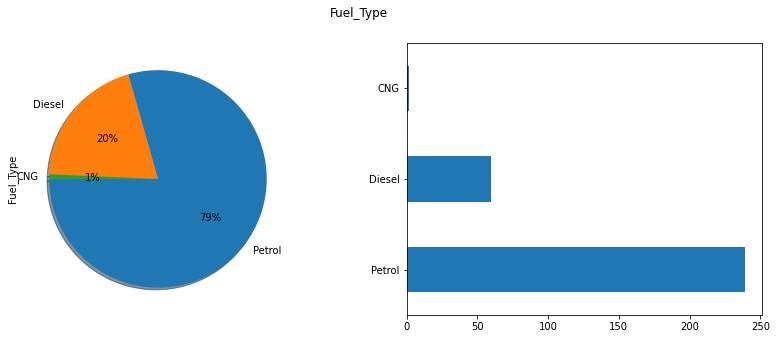

In [19]:
plot_categorial("Fuel_Type")

### Seller Type

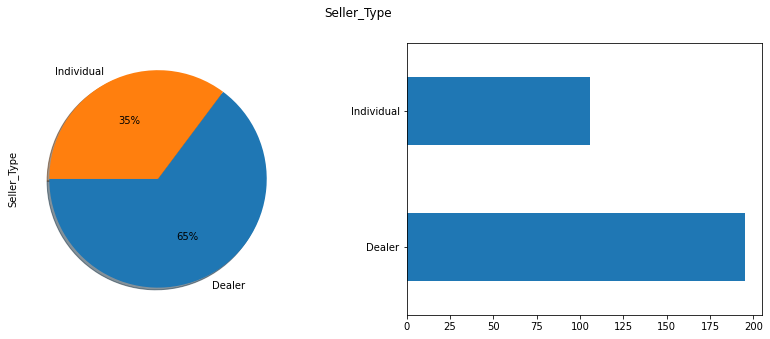

In [20]:
plot_categorial("Seller_Type")

### Transmission Type

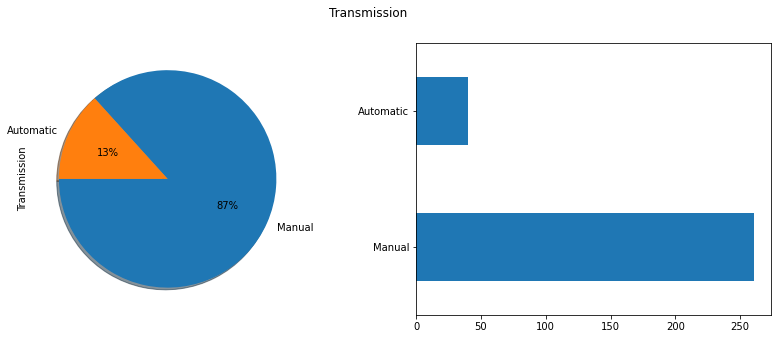

In [21]:
plot_categorial("Transmission")

### No of Owner

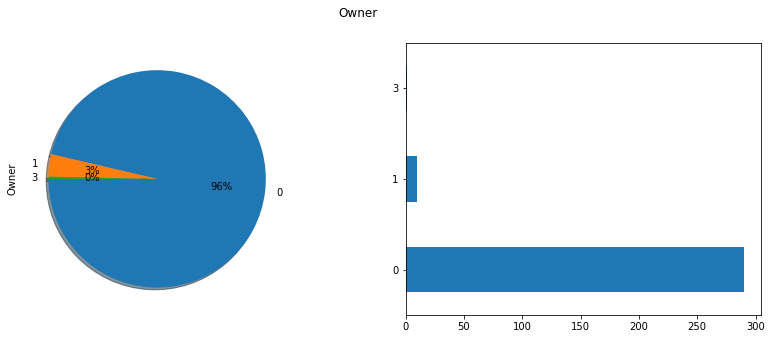

In [22]:
plot_categorial("Owner")

### Selling Price

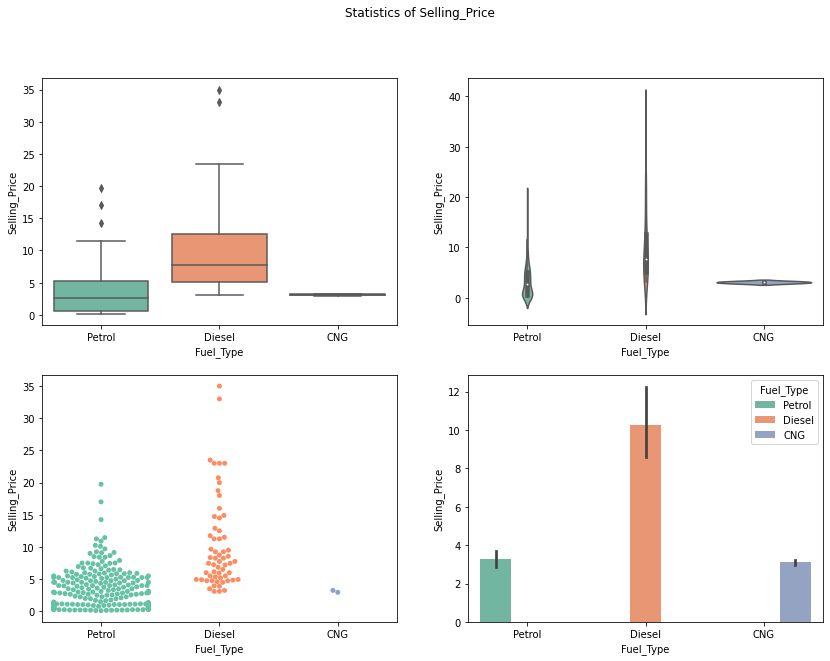

In [23]:
plot_stats("Selling_Price")

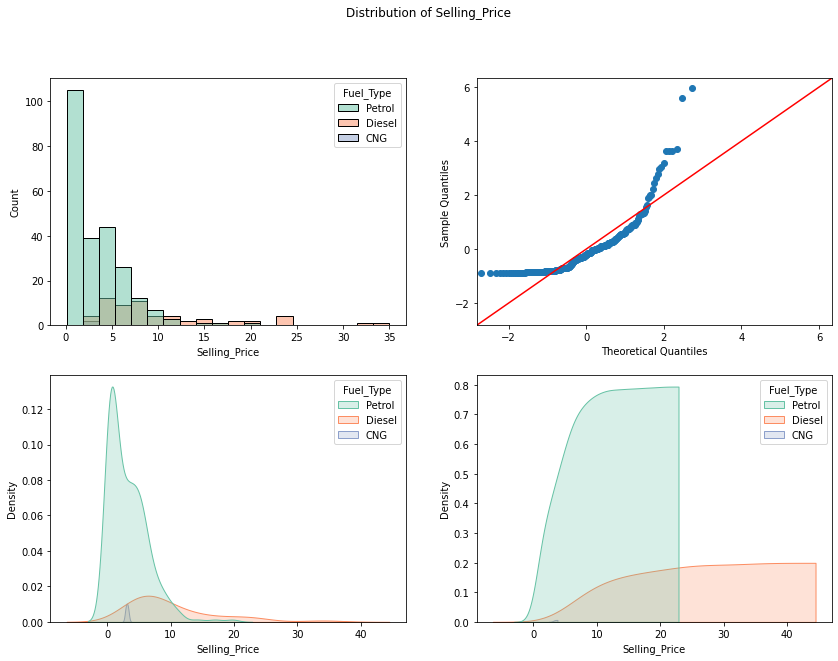

In [24]:
plot_distribution("Selling_Price")

### Present Price

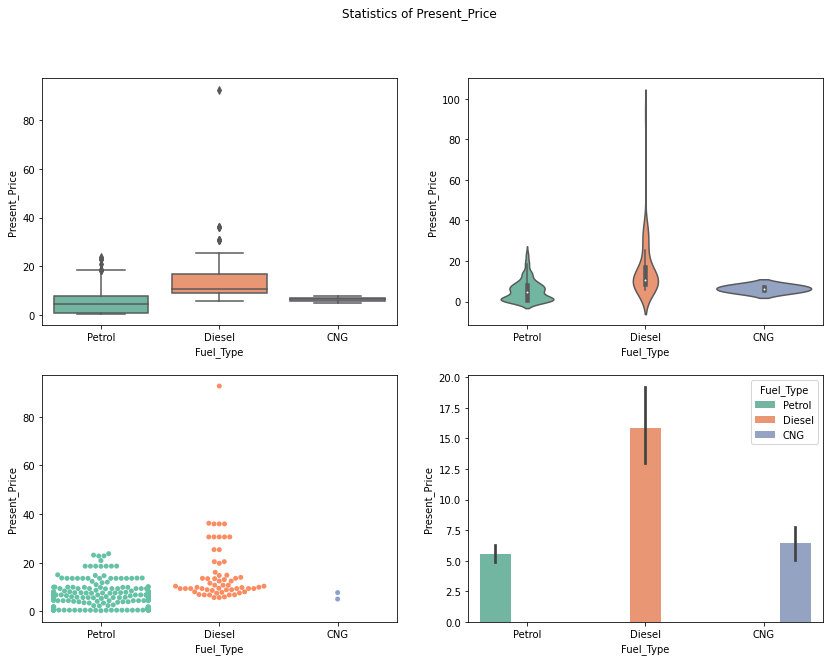

In [25]:
plot_stats("Present_Price")

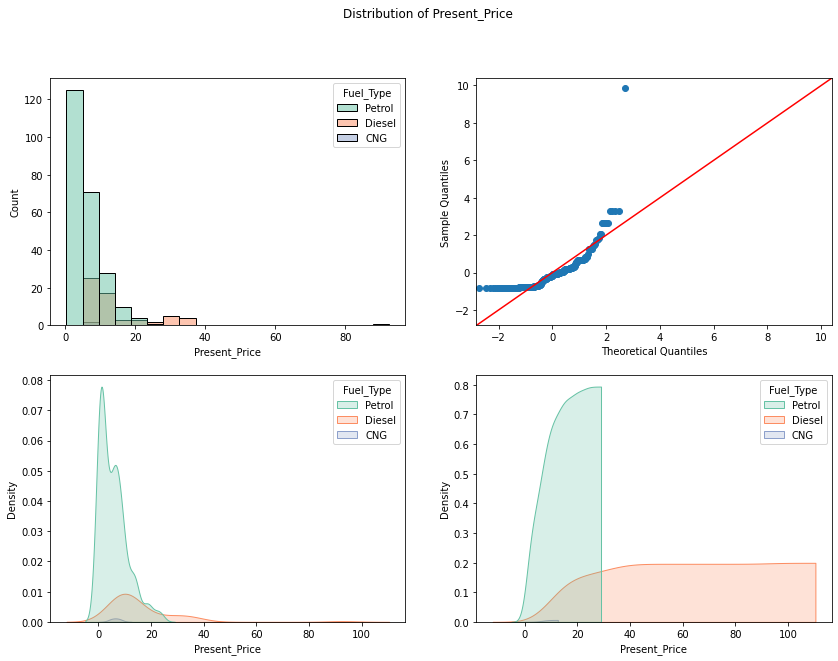

In [26]:
plot_distribution("Present_Price")

### Kilometers Driven

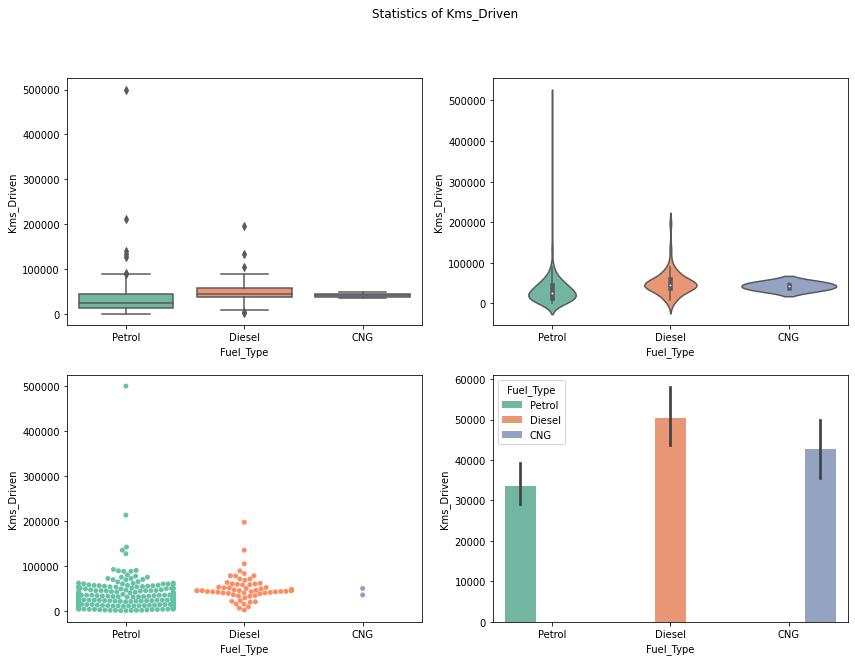

In [27]:
plot_stats("Kms_Driven")

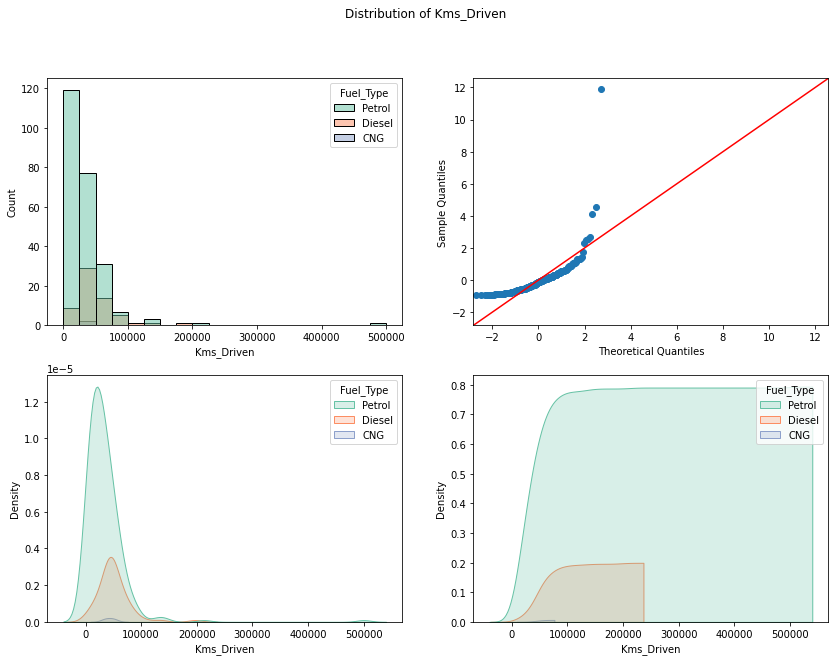

In [28]:
plot_distribution("Kms_Driven")

### Kernel Density Estimation

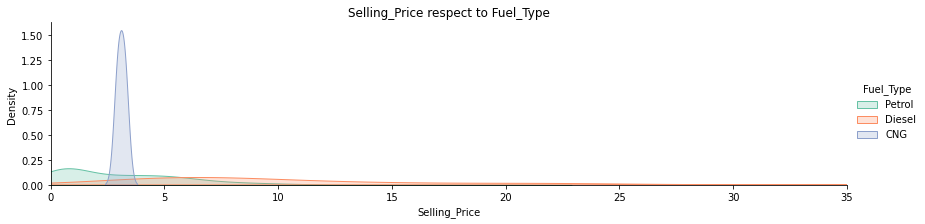

In [29]:
plot_kde("Selling_Price", "Fuel_Type")

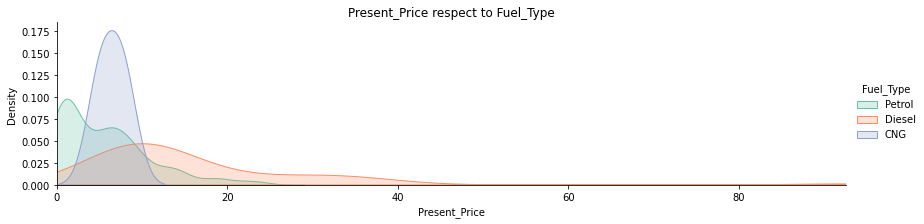

In [30]:
plot_kde("Present_Price", "Fuel_Type")

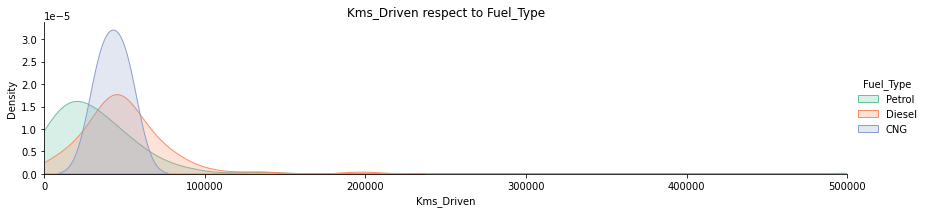

In [31]:
plot_kde("Kms_Driven", "Fuel_Type")

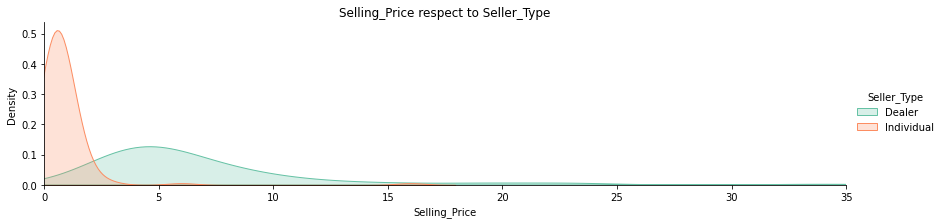

In [32]:
plot_kde("Selling_Price", "Seller_Type")

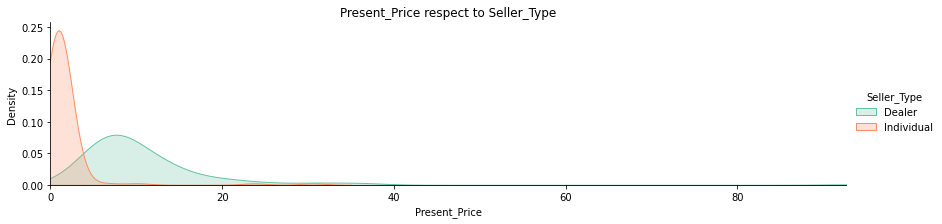

In [33]:
plot_kde("Present_Price", "Seller_Type")

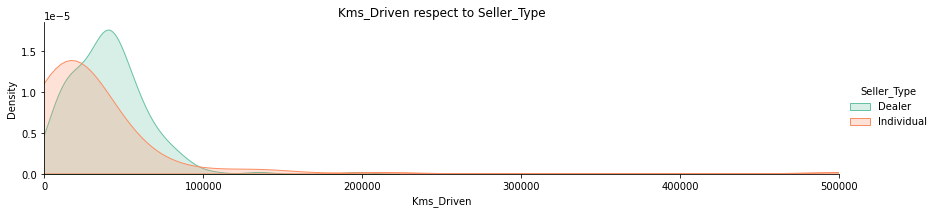

In [34]:
plot_kde("Kms_Driven", "Seller_Type")

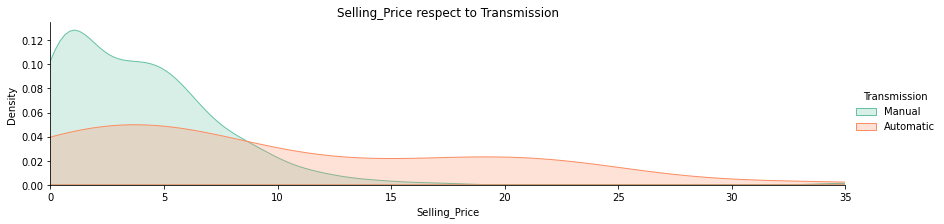

In [35]:
plot_kde("Selling_Price", "Transmission")

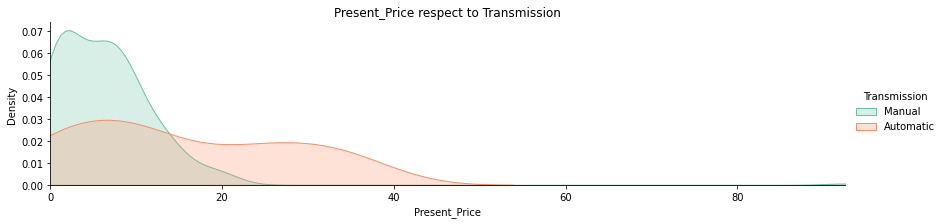

In [36]:
plot_kde("Present_Price", "Transmission")

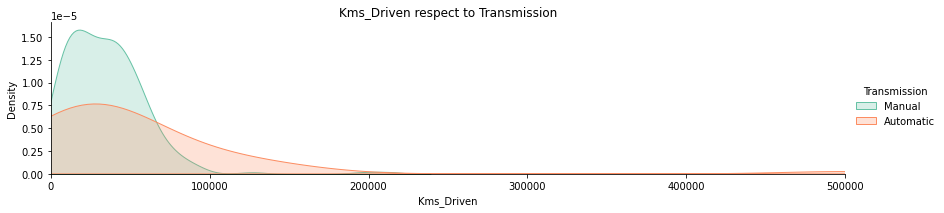

In [37]:
plot_kde("Kms_Driven", "Transmission")

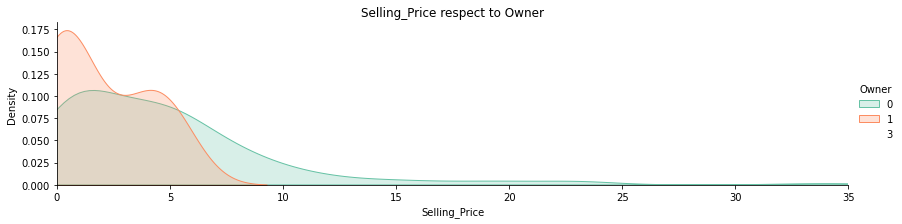

In [38]:
plot_kde("Selling_Price", "Owner")

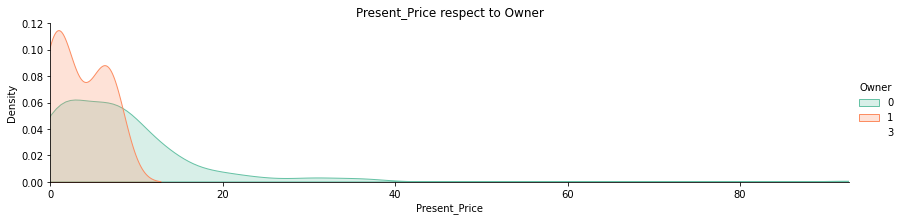

In [39]:
plot_kde("Present_Price", "Owner")

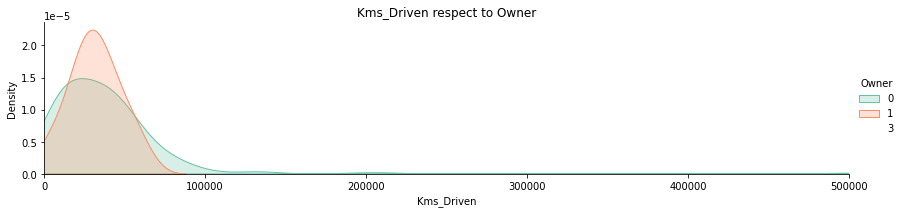

In [40]:
plot_kde("Kms_Driven", "Owner")

### Relational Plots

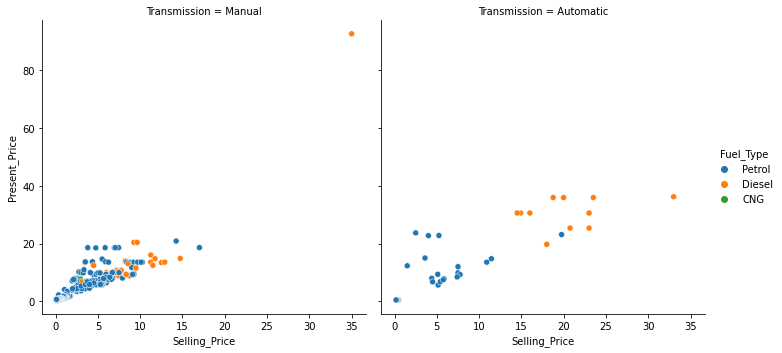

In [41]:
sns.relplot(
    x=df.Selling_Price, y=df.Present_Price, hue=df.Fuel_Type, col=df.Transmission
)  # scatter plot for selling price vs present price by fuel type and cols as Transmission
plt.show()  # displays plot

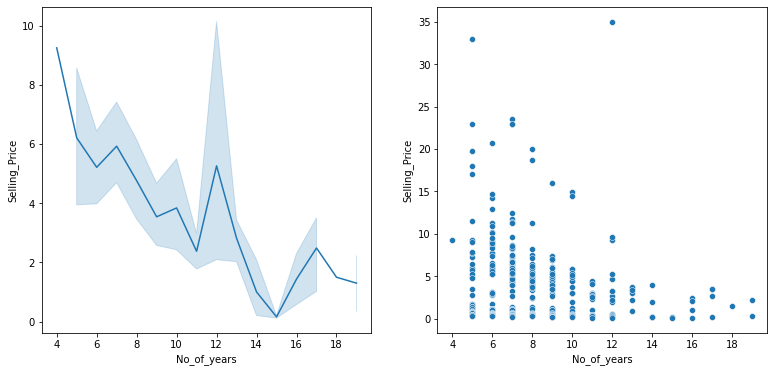

In [42]:
fig, axes = plt.subplots(
    ncols=2, figsize=(13, 6)
)  # plots a 2 x 2 subplot of figure size as 13 x 2
sns.lineplot(
    x="No_of_years", y="Selling_Price", data=df, ax=axes[0]
)  # lineplot no of years vs selling price
sns.scatterplot(
    x="No_of_years", y="Selling_Price", data=df, ax=axes[1]
)  # scatter plot no of years vs selling price
plt.show()  # displays plot

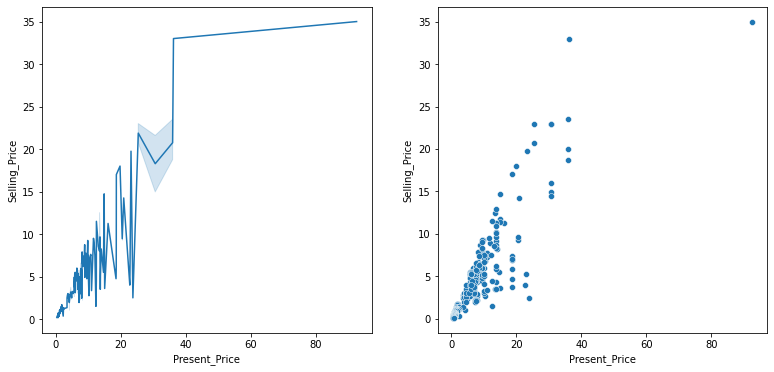

In [43]:
fig, axes = plt.subplots(
    ncols=2, figsize=(13, 6)
)  # plots a 2 x 2 subplot of figure size as 13 x 2
sns.lineplot(
    x="Present_Price", y="Selling_Price", data=df, ax=axes[0]
)  # lineplot Present_Price vs selling price
sns.scatterplot(
    x="Present_Price", y="Selling_Price", data=df, ax=axes[1]
)  # scatter plot Present_Price vs selling price
plt.show()  # displays plot

### Regression Plots

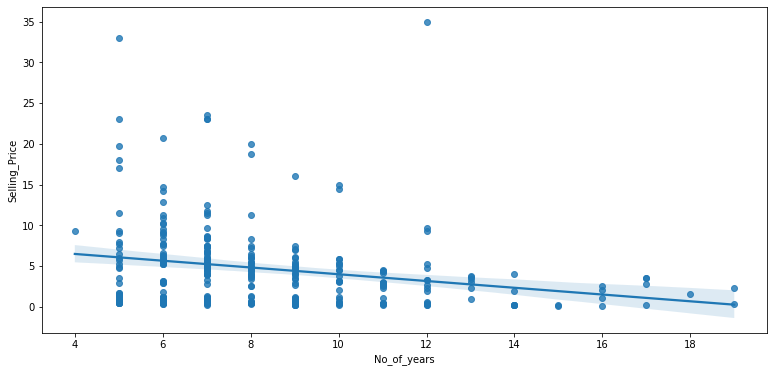

In [44]:
plt.figure(figsize=(13, 6))  # sets figure size as 13 x 6
sns.regplot(x="No_of_years", y="Selling_Price", data=df)  # No of years vs Selling price
plt.show()  # displays plot

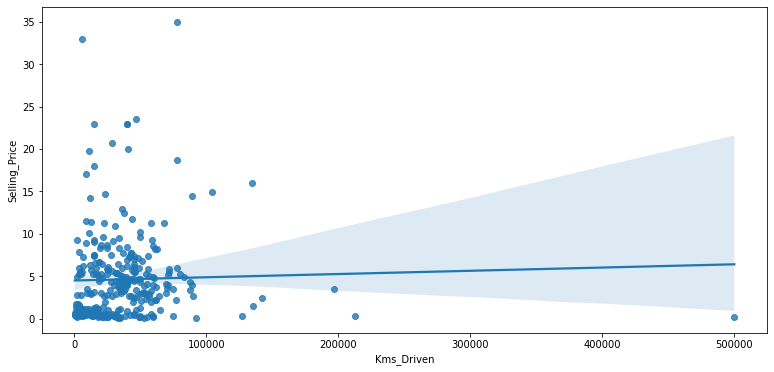

In [45]:
plt.figure(figsize=(13, 6))  # sets figure size as 13 x 6
sns.regplot(x="Kms_Driven", y="Selling_Price", data=df)  # kms_driven vs selling price
plt.show()  # displays plot

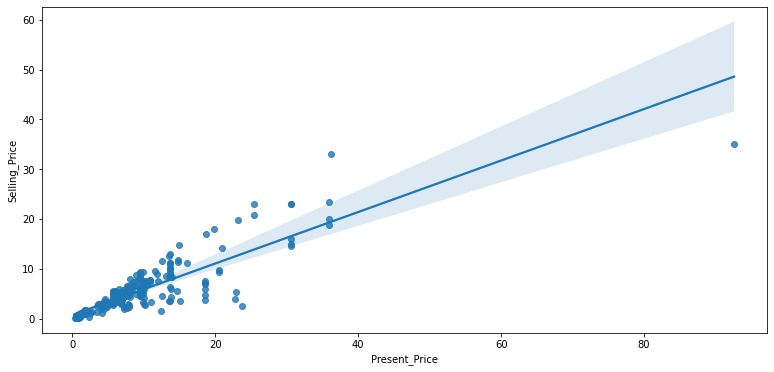

In [46]:
plt.figure(figsize=(13, 6))  # sets figure size as 13 x 6
sns.regplot(
    x="Present_Price", y="Selling_Price", data=df
)  # present price vs selling price
plt.show()  # displays plot

## Feature Engineering

### Frequency Encoding

In [47]:
def frequency_encoding(df, var):
    encoded_feature = df[var].value_counts().to_dict()
    df[var] = df[var].map(encoded_feature)


for col in df[["Fuel_Type", "Seller_Type", "Transmission"]]:
    frequency_encoding(df, col)

df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,239,195,261,0,8
1,4.75,9.54,43000,60,195,261,0,9
2,7.25,9.85,6900,239,195,261,0,5
3,2.85,4.15,5200,239,195,261,0,11
4,4.60,6.87,42450,60,195,261,0,8


### Correlation Heatmaps

In [48]:
def correlation_heatmap(col_name, colormap="Blues_r"):
    fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
    mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
    cat_heatmap = sns.heatmap(
        resign_corr, mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap=colormap
    )  # cornor heatmap of the dataframe correlation
    cat_heatmap.set_title(
        "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
    )  # sets the title for the heatmap with font size 14 and padding 12

    heatmap = sns.heatmap(
        resign_corr[[col_name]].sort_values(by=col_name, ascending=False),
        vmin=-1,
        vmax=1,
        annot=True,
        ax=ax[1],
        cmap=colormap,
    )  # create heatmap for features correlating with the dependant varibale 'Outcome'
    heatmap.set_title(
        f"Features Correlating with {col_name}",
        fontdict={"fontsize": 14},
        pad=16,  # sets the title for the heatmap with font size 14 and padding 16
    )
    plt.show()  # shows the subplot


resign_corr = (
    df.corr()
)  # calculates correlation between dataframe columns using pearson correlation method
resign_corr.T  # dataframe transpose

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
Selling_Price,1.000000,0.878983,0.029187,-0.532283,0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,-0.458764,0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,-0.171526,0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.532283,-0.458764,-0.171526,1.000000,-0.357776,0.087831,0.055917,0.058076
Seller_Type,0.550724,0.512030,0.101419,-0.357776,1.000000,-0.063240,-0.124269,-0.039896
Transmission,-0.367128,-0.348715,-0.162510,0.087831,-0.063240,1.000000,-0.050316,-0.000394
Owner,-0.088344,0.008057,0.089216,0.055917,-0.124269,-0.050316,1.000000,0.182104
No_of_years,-0.236141,0.047584,0.524342,0.058076,-0.039896,-0.000394,0.182104,1.000000


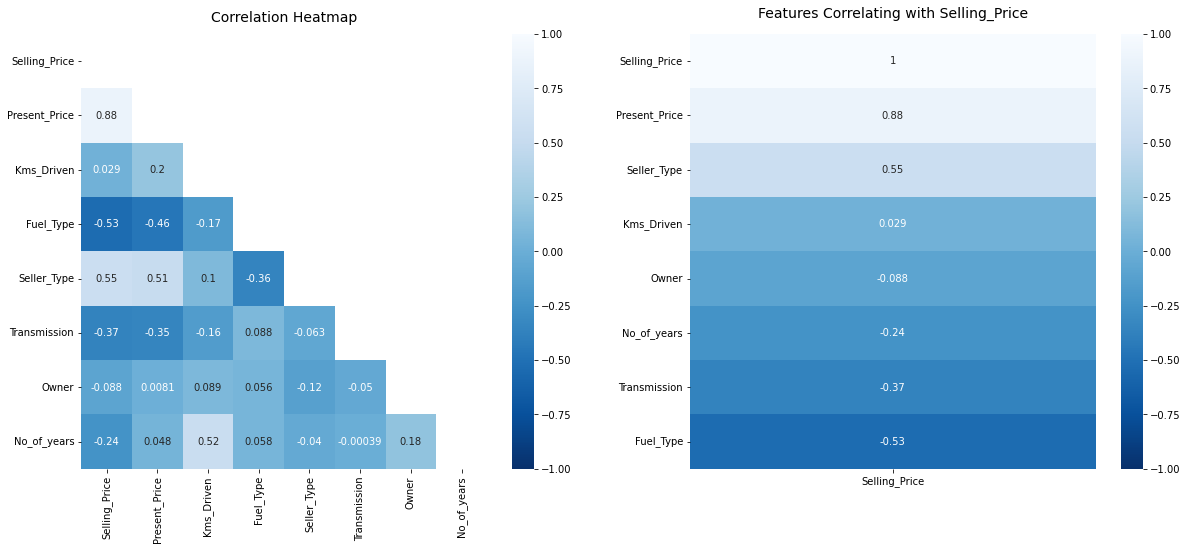

In [49]:
correlation_heatmap("Selling_Price")

## Data Splitting

In [50]:
X = df.drop(["Selling_Price"], axis=1)  # X contains all independant features
y = df["Selling_Price"]  # Y contains only the dependant feature

In [51]:
X[:5]

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,5.59,27000,239,195,261,0,8
1,9.54,43000,60,195,261,0,9
2,9.85,6900,239,195,261,0,5
3,4.15,5200,239,195,261,0,11
4,6.87,42450,60,195,261,0,8


In [52]:
y[:5]

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
X_train[:5]

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
184,0.750,26000,239,106,261,1,14
132,0.950,3500,239,106,261,0,5
194,0.787,50000,239,106,261,0,14
75,6.800,36000,239,195,261,0,7
111,1.500,8700,239,106,261,0,6


In [55]:
y_train[:5]

184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
Name: Selling_Price, dtype: float64

In [56]:
X_test[:5]

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
177,0.57,24000,239,106,40,0,6
289,13.60,10980,239,195,261,0,6
228,9.40,60000,60,195,261,0,10
198,0.57,35000,239,106,261,1,11
60,18.61,40001,239,195,261,0,9


In [57]:
y_test[:5]

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
Name: Selling_Price, dtype: float64

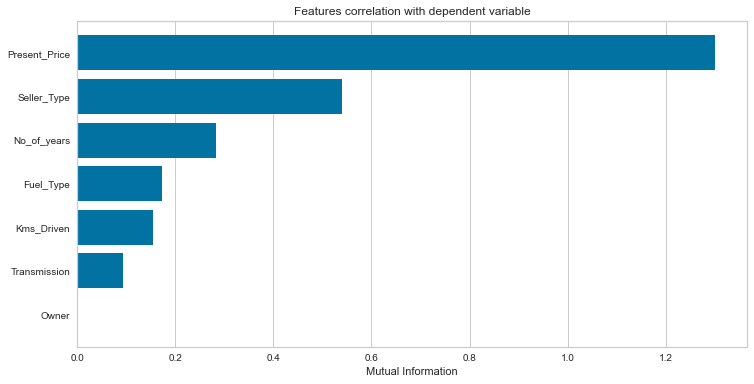

In [58]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(12, 6))  # sets figure size as 12 x 6
visualizer = FeatureCorrelation(
    method="mutual_info-regression", labels=X.columns, sort=True
)  # plots features correlation using mutual_info-regression method and sort values in descending order
visualizer.fit(X, y)  # fits visualizer
visualizer.show()  # shows plot's xlabel, ylabel & title
plt.show()  # displays plot

## Model Building

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    max_features="sqrt", bootstrap=True
)  # instance of Random Forest Regressor
rf_reg.fit(X_train, y_train)  # fitting model

RandomForestRegressor(max_features='sqrt')

In [60]:
y_pred = rf_reg.predict(X_test)  # predict on x_test
y_train_pred = rf_reg.predict(X_train)  # predict on x_train

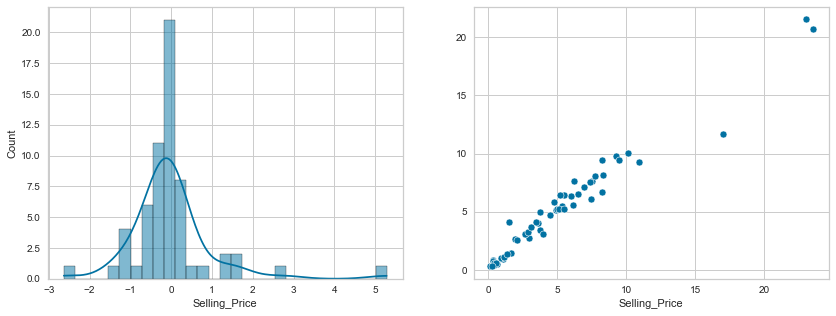

In [61]:
# plot grid 1 x 2 of size 14 x 5
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x=y_test - y_pred, ax=axes[0], kde=True)  # histogram with kde curve
sns.scatterplot(x=y_test, y=y_pred, ax=axes[1])  # scatterplot y_test vs y_pred
plt.show()  # displays plot

#### Prediction Error 

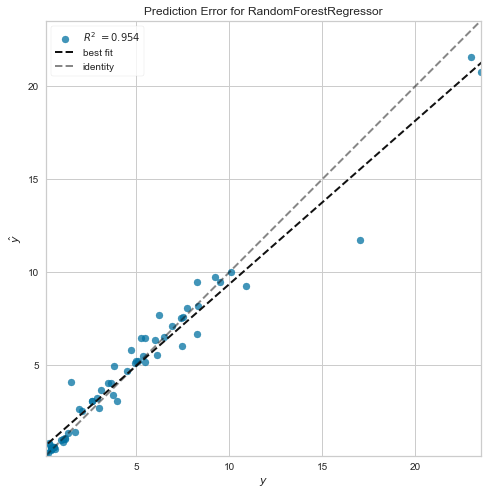

In [62]:
from yellowbrick.regressor import PredictionError

plt.figure(figsize=(14, 8))  # sets figure size as 14 x 8
visualizer = PredictionError(rf_reg)  # plots predict error plot
visualizer.fit(X_train, y_train)  # fits visualizer
visualizer.score(X_test, y_test)  # sets score in plot's legend
visualizer.show()  # shows x_label, y_label, title & legend
plt.show()  # displays plot

#### Residuals Plot

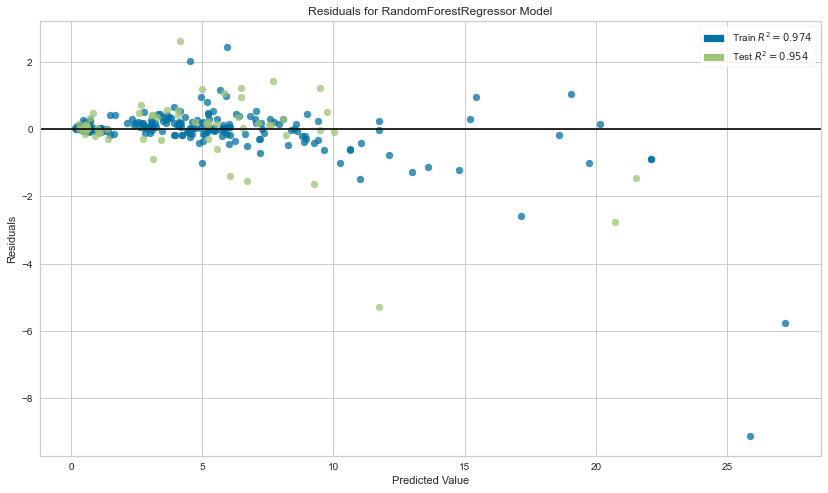

In [63]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(14, 8))  # sets figure size as 14 x 8
visualizer = ResidualsPlot(rf_reg, hist=False)  # plots residuals plot
visualizer.fit(X_train, y_train)  # fits visualizer
visualizer.score(X_test, y_test)  # sets score in plot's legend
visualizer.show()  # shows x_label, y_label, title & legend
plt.show()  # displays plot

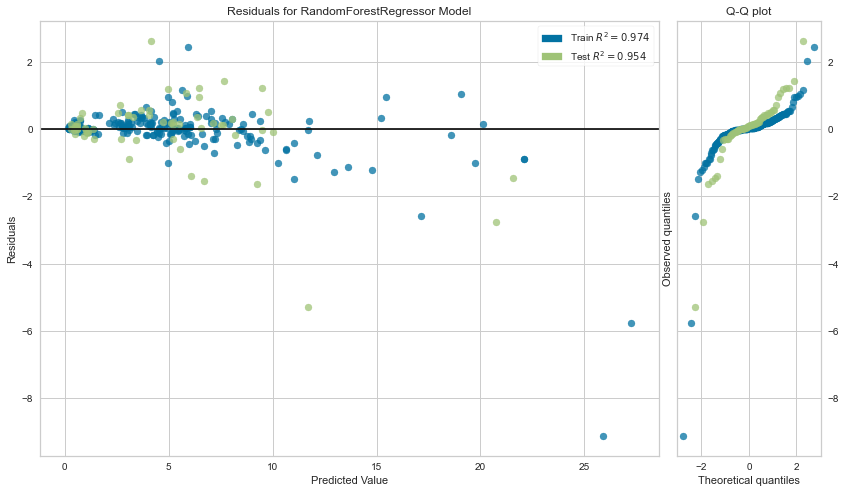

In [64]:
plt.figure(figsize=(14, 8))  # sets figure size as 14 x 8
visualizer = ResidualsPlot(
    rf_reg, hist=False, qqplot=True
)  # plots residuals plot with qqplot
visualizer.fit(X_train, y_train)  # fits visualizer
visualizer.score(X_test, y_test)  # sets score in plot's legend
visualizer.show()  # shows x_label, y_label, title & legend
plt.show()  # displays plot

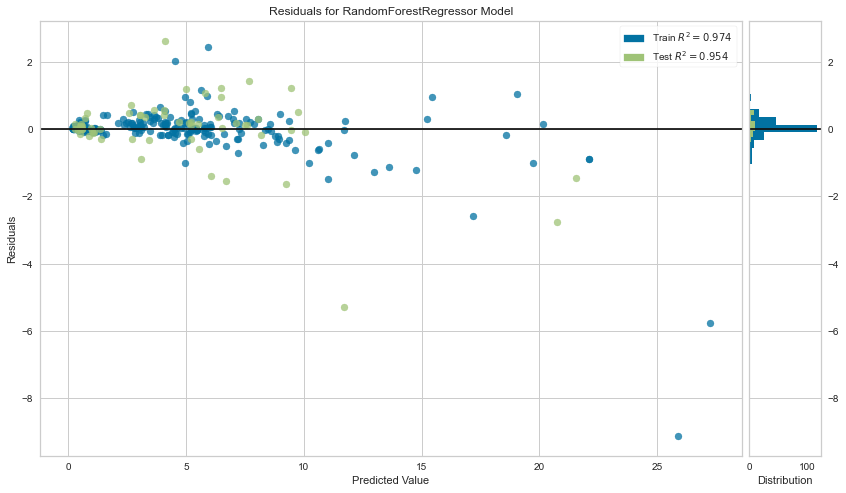

In [65]:
plt.figure(figsize=(14, 8))  # sets figure size as 14 x 8
visualizer = ResidualsPlot(rf_reg, hist=True)  # plots residuals plot with histogram
visualizer.fit(X_train, y_train)  # fits visualizer
visualizer.score(X_test, y_test)  # sets score in plot's legend
visualizer.show()  # shows x_label, y_label, title & legend
plt.show()  # displays plot

In [66]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
)


# function to evaluate model by using mean_absolute_error, mean_squared_error, root mean_squared_error, r2_score and explained_variance_score
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted) * 100
    accuracy = explained_variance_score(true, predicted) * 100
    return mae, mse, rmse, r2_square, accuracy


rf_df = pd.DataFrame(
    data=[
        [
            "Test Set",
            rf_reg.__class__.__name__,
            *evaluate(y_train, y_train_pred),
        ],  # calls evaluate() -> test set
        [
            "Train Set",
            rf_reg.__class__.__name__,
            *evaluate(y_test, y_pred),
        ],  # calls evaluate() -> train set
    ],
    columns=[
        "Dataset",
        "Model Name",
        "MAE",
        "MSE",
        "RMSE",
        "R2 square",
        "Explained Variance Score",
    ],  # column names for the dataframe
)

rf_df  # displays dataframe

,Dataset,Model Name,MAE,MSE,RMSE,R2 square,Explained Variance Score
0,Test Set,RandomForestRegressor,0.304665,0.674768,0.821443,97.447642,97.451886
1,Train Set,RandomForestRegressor,0.578695,1.063092,1.031064,95.384999,95.385004


## Saving ML Model

In [67]:
import os
import joblib

if not os.path.exists("../model/"):
    os.mkdir("../model/")
joblib.dump(rf_reg, "../model/model.pkl")

['../model/model.pkl']

In [68]:
for file in os.listdir(path="../model/"):
    if file.endswith(".pkl"):
        print(file)

model.pkl
